### Introduction
In this project, a dataset of about 81312  rows and 20 columns was given regarding the reviews of various board games available. A supervised machine learning model will be trained and evaluated to predict the ratings given to a particular board game based on several features of the datasets. Supervised machine learning models like linear regression and decision trees will be used.



##### Building the dataset

In this project the dataset that is being used is obtained from the GitHub repository mentioned below. The repository was cloned using Git. The games.csv file contains all the data that we need.

Link: https://github.com/ThaWeatherman/scrapers.git

##### Importing necessary libraries and loading the data

In [229]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [230]:
path = os.getcwd() + '\games.csv'
path

'C:\\Users\\Samreen\\Documents\\ML Projects\\games.csv'

In [231]:
df = pd.read_csv(path)
df

,id,type,name,yearpublished,minplayers,maxplayers,playingtime,minplaytime,maxplaytime,minage,users_rated,average_rating,bayes_average_rating,total_owners,total_traders,total_wanters,total_wishers,total_comments,total_weights,average_weight
0,12333,boardgame,Twilight Struggle,2005.0,2.0,2.0,180.0,180.0,180.0,13.0,20113,8.33774,8.22186,26647,372,1219,5865,5347,2562,3.4785
1,120677,boardgame,Terra Mystica,2012.0,2.0,5.0,150.0,60.0,150.0,12.0,14383,8.28798,8.14232,16519,132,1586,6277,2526,1423,3.8939
2,102794,boardgame,Caverna: The Cave Farmers,2013.0,1.0,7.0,210.0,30.0,210.0,12.0,9262,8.28994,8.06886,12230,99,1476,5600,1700,777,3.7761
3,25613,boardgame,Through the Ages: A Story of Civilization,2006.0,2.0,4.0,240.0,240.0,240.0,12.0,13294,8.20407,8.05804,14343,362,1084,5075,3378,1642,4.1590
4,3076,boardgame,Puerto Rico,2002.0,2.0,5.0,150.0,90.0,150.0,12.0,39883,8.14261,8.04524,44362,795,861,5414,9173,5213,3.2943
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
81307,184441,boardgameexpansion,Micro Rome: Aegyptus,2015.0,1.0,1.0,0.0,30.0,0.0,10.0,0,0.00000,0.00000,0,0,0,0,0,0,0.0000
81308,184442,boardgame,Trivial Pursuit: Marvel Cinematic Universe Da...,2013.0,2.0,0.0,0.0,0.0,0.0,12.0,0,0.00000,0.00000,0,0,0,0,0,0,0.0000
81309,184443,boardgame,BEARanoia,2015.0,2.0,15.0,1.0,1.0,1.0,0.0,0,0.00000,0.00000,0,0,0,0,0,0,0.0000
81310,184449,boardgame,Freight,2015.0,2.0,4.0,60.0,30.0,60.0,8.0,0,0.00000,0.00000,0,0,0,0,0,0,0.0000


##### Exploring the dataset

In [232]:
df.shape

(81312, 20)

In [233]:
df.columns

Index(['id', 'type', 'name', 'yearpublished', 'minplayers', 'maxplayers',
       'playingtime', 'minplaytime', 'maxplaytime', 'minage', 'users_rated',
       'average_rating', 'bayes_average_rating', 'total_owners',
       'total_traders', 'total_wanters', 'total_wishers', 'total_comments',
       'total_weights', 'average_weight'],
      dtype='object')

In [234]:
df.describe()

,id,yearpublished,minplayers,maxplayers,playingtime,minplaytime,maxplaytime,minage,users_rated,average_rating,bayes_average_rating,total_owners,total_traders,total_wanters,total_wishers,total_comments,total_weights,average_weight
count,81312.000000,81309.000000,81309.000000,81309.000000,81309.000000,81309.000000,81309.000000,81309.000000,81312.000000,81312.000000,81312.000000,81312.000000,81312.000000,81312.000000,81312.000000,81312.000000,81312.000000,81312.000000
mean,72278.150138,1806.630668,1.992018,5.637703,51.634788,49.276833,51.634788,6.983975,161.886585,4.212144,1.157632,262.502509,9.236423,12.688890,42.719144,49.290031,16.488009,0.908083
std,58818.237742,588.517834,0.931034,56.076890,345.699969,334.483934,345.699969,5.035138,1145.978126,3.056551,2.340033,1504.536693,39.757408,60.764207,239.292628,284.862853,115.980285,1.176002
min,1.000000,-3500.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,21339.750000,1984.000000,2.000000,2.000000,8.000000,10.000000,8.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,43258.000000,2003.000000,2.000000,4.000000,30.000000,30.000000,30.000000,8.000000,2.000000,5.265620,0.000000,7.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000
75%,128836.500000,2010.000000,2.000000,6.000000,60.000000,60.000000,60.000000,12.000000,16.000000,6.718777,0.000000,51.000000,2.000000,3.000000,7.000000,9.000000,2.000000,1.916700
max,184451.000000,2018.000000,99.000000,11299.000000,60120.000000,60120.000000,60120.000000,120.000000,53680.000000,10.000000,8.221860,73188.000000,1395.000000,1586.000000,6402.000000,11798.000000,5996.000000,5.000000


From the above information we can see that we might need standardizing the data as the scales are not same.

#### Visualizing the data

**1.Creating histograms:**

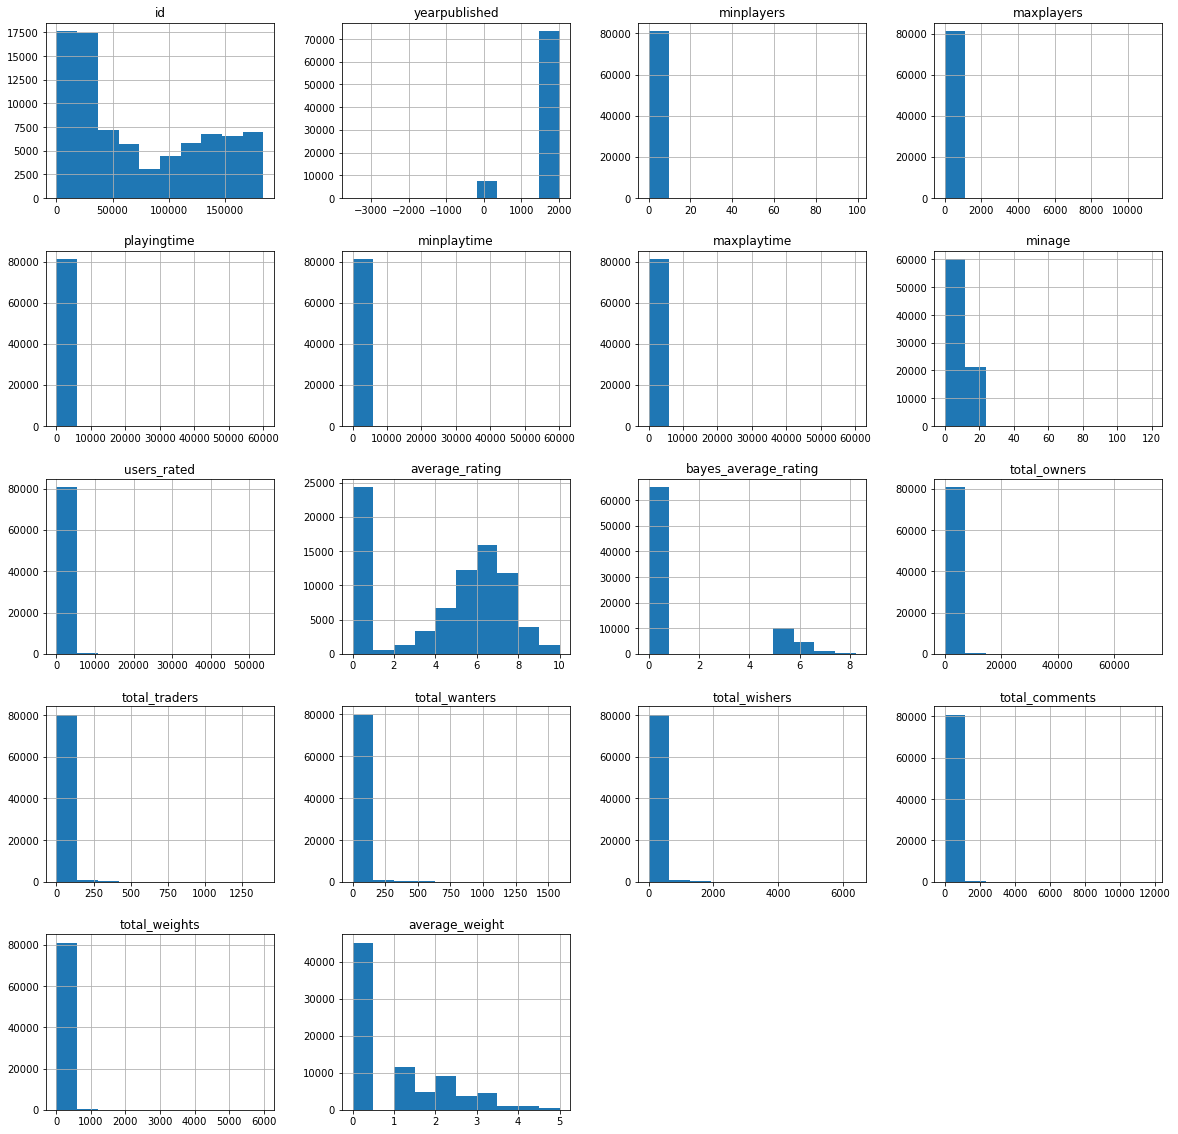

In [235]:
df.hist(figsize = (20,20))
plt.show()

*Observation from the histogram plots:*

- The average_rating plot is of interest to us. Here, we can see that most of the games have been rated zero by the users. These rows need to be closely observed to determine the reason for the zero rating.

In [236]:
#print the first game that comes up which has zero rating
df[df['average_rating']==0].iloc[0]

id                             318
type                     boardgame
name                    Looney Leo
yearpublished                    0
minplayers                       0
maxplayers                       0
playingtime                      0
minplaytime                      0
maxplaytime                      0
minage                           0
users_rated                      0
average_rating                   0
bayes_average_rating             0
total_owners                     0
total_traders                    0
total_wanters                    0
total_wishers                    1
total_comments                   0
total_weights                    0
average_weight                   0
Name: 13048, dtype: object

In [237]:
#print the first game that comes up which has non zero rating
df[df['average_rating'] > 0].iloc[0]

id                                  12333
type                            boardgame
name                    Twilight Struggle
yearpublished                        2005
minplayers                              2
maxplayers                              2
playingtime                           180
minplaytime                           180
maxplaytime                           180
minage                                 13
users_rated                         20113
average_rating                    8.33774
bayes_average_rating              8.22186
total_owners                        26647
total_traders                         372
total_wanters                        1219
total_wishers                        5865
total_comments                       5347
total_weights                        2562
average_weight                     3.4785
Name: 0, dtype: object

Now if we compare Looney Leo which has zero rating and Twilight Struggle which has rating of 8.3, we can see that 
the first game also has 0 users who have rated it, which means this game has not been rated at all.

We can confirm it further if we see more games with zero ratings as shown below:

In [238]:
df[df['average_rating']==0].iloc[0:10]

,id,type,name,yearpublished,minplayers,maxplayers,playingtime,minplaytime,maxplaytime,minage,users_rated,average_rating,bayes_average_rating,total_owners,total_traders,total_wanters,total_wishers,total_comments,total_weights,average_weight
13048,318,boardgame,Looney Leo,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0.0,0.0,0,0,0,1,0,0,0.0
13068,579,boardgame,Field of Fire,2002.0,2.0,0.0,0.0,0.0,0.0,12.0,0,0.0,0.0,2,0,0,1,0,0,0.0
13114,894,boardgame,LifeLinks,2000.0,1.0,8.0,10.0,10.0,10.0,8.0,0,0.0,0.0,2,0,1,1,0,0,0.0
13116,897,boardgame,Dear Abby,1992.0,3.0,4.0,60.0,60.0,60.0,13.0,0,0.0,0.0,7,1,0,0,0,0,0.0
13124,946,boardgame,Rolazone,1999.0,2.0,2.0,30.0,30.0,30.0,0.0,0,0.0,0.0,0,0,0,3,0,0,0.0
13127,962,boardgame,Contango,2000.0,2.0,6.0,90.0,90.0,90.0,10.0,0,0.0,0.0,0,0,0,2,1,0,0.0
13169,1097,boardgame,Don't Give Up Your Day Job!,2000.0,6.0,41.0,120.0,120.0,120.0,8.0,0,0.0,0.0,0,0,0,2,0,0,0.0
13180,1151,boardgame,"Money, Power, Respect",2000.0,2.0,6.0,90.0,90.0,90.0,8.0,0,0.0,0.0,1,0,0,2,0,0,0.0
13181,1154,boardgame,Nuts! To You,1987.0,2.0,2.0,20.0,20.0,20.0,6.0,0,0.0,0.0,2,0,0,1,0,0,0.0
13188,1180,boardgame,Tower of Babylon,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0.0,0.0,5,0,2,2,0,0,0.0


Hence we can confirm that all those games which have zero rating have not been rated at all!

So we need to remove those games which have zero rating.

We also need to remove those games which have missing values.

In [239]:
df.isnull().sum()

id                       0
type                     0
name                    41
yearpublished            3
minplayers               3
maxplayers               3
playingtime              3
minplaytime              3
maxplaytime              3
minage                   3
users_rated              0
average_rating           0
bayes_average_rating     0
total_owners             0
total_traders            0
total_wanters            0
total_wishers            0
total_comments           0
total_weights            0
average_weight           0
dtype: int64

There are 41 games with missing values.

Cleaning the dataset now:

In [240]:
# Removing the rows with missing values
df = df.dropna(axis = 0)

In [241]:
# Removing rows with 0 user reviews
df = df[df["users_rated"] > 0]

(array([  602.,  1231.,  2824.,  5206.,  8223., 13593., 13849.,  8470.,
         2224.,   672.]),
 array([ 1. ,  1.9,  2.8,  3.7,  4.6,  5.5,  6.4,  7.3,  8.2,  9.1, 10. ]),
 <BarContainer object of 10 artists>)

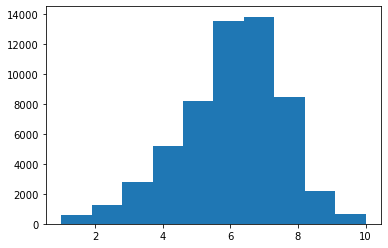

In [242]:
#Plotting the histogram again
plt.hist(df["average_rating"])

Now the historgram doesn't have any value for 0.

**2. Creating scatter matrix:**
A good way to understand the correlation among the features, is to create scatter plots for each pair of attributes. Pandas has a function scatter_matrix(), for this purpose. scatter_matrix() can be used to easily generate a group of scatter plots between all pairs of numerical features. It creates a plot for each numerical feature against every other numerical feature and also a histogram for each of them.

See figures below.

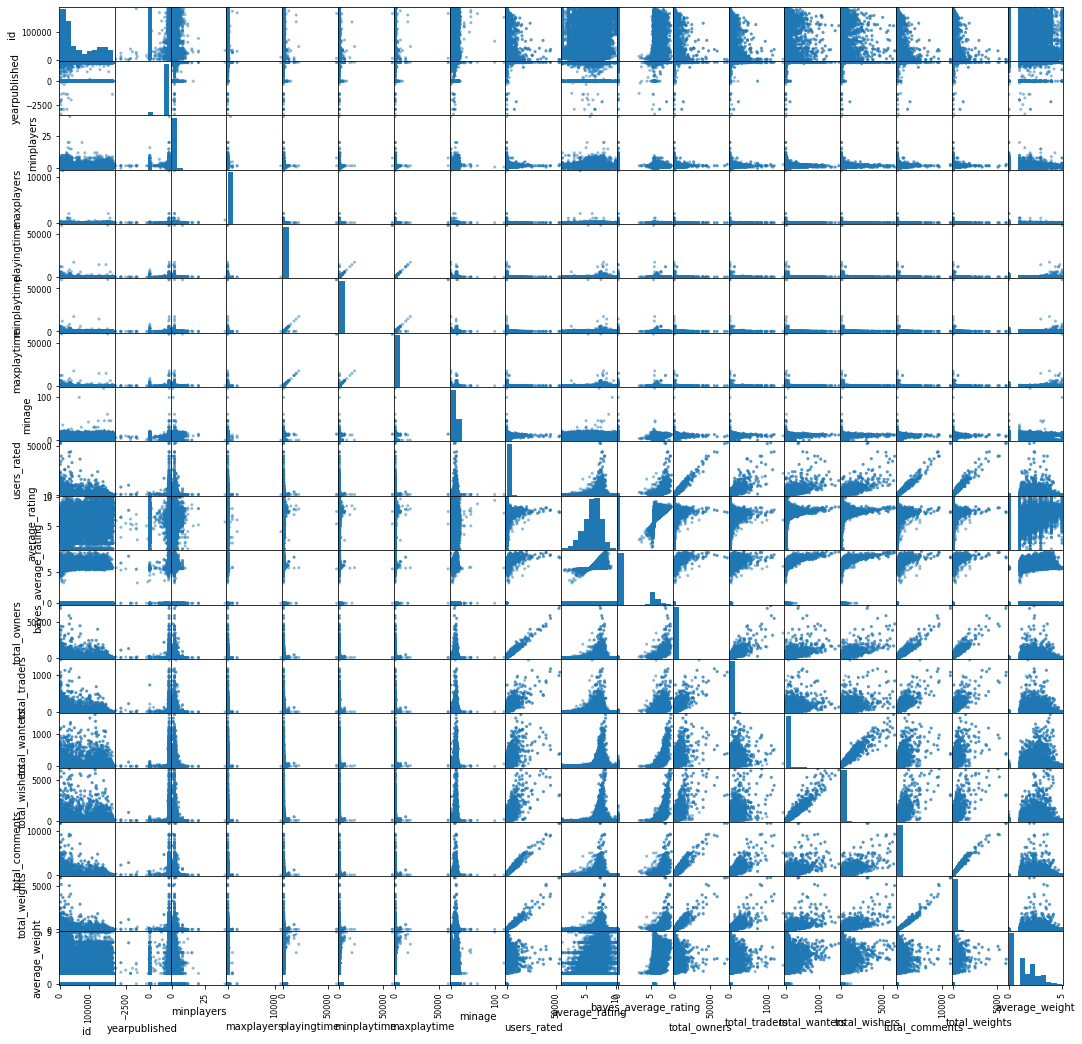

In [243]:
from pandas.plotting import scatter_matrix

scatter_matrix(df,figsize=(18,18))
plt.show()

*Observations from the scatter matrix:*

- We can observe that some features do have linear relation among them. So we can use a linear regression model later.

**We can also see the correlation among different features using heatmap as follows:** (it provides better visualization)



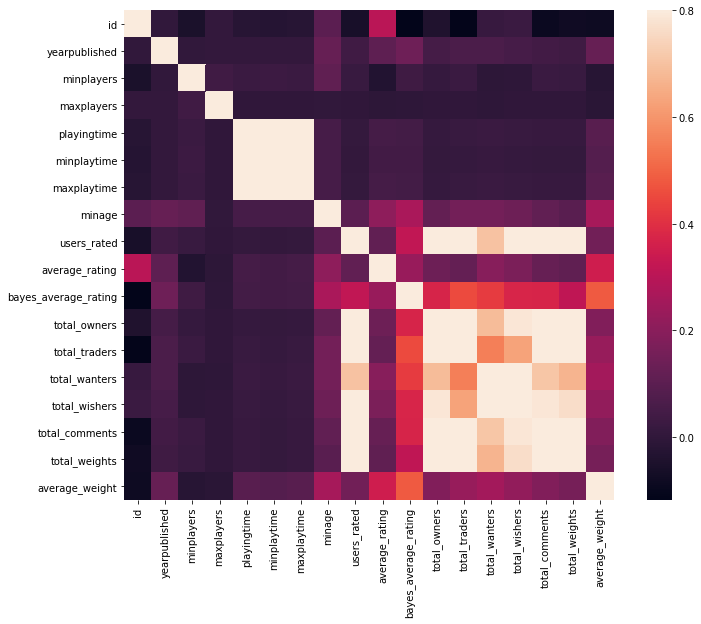

In [244]:
import seaborn as sns
corr_mat = df.corr()
fig = plt.figure(figsize = (12, 9))
sns.heatmap(corr_mat, vmax=.8, square=True);
plt.show()

*Observations from the correlation matrix:*

The correlation matrix will help us to decide if there are some features which we can remove as they are not actually related to the games. 

- The id column and bayes average rating column, though showing a high correlation with average rating, can be removed because it doesn't say anything about the games itself. And since it is highly correlated with average rating, if included, it could affect our results to a great extent.

- Columns like 'type', 'name' and 'yearpublished' could also be removed rightaway as they provide negligible information pertaining to the predictor 'average_rating'.

In [245]:
df.columns

Index(['id', 'type', 'name', 'yearpublished', 'minplayers', 'maxplayers',
       'playingtime', 'minplaytime', 'maxplaytime', 'minage', 'users_rated',
       'average_rating', 'bayes_average_rating', 'total_owners',
       'total_traders', 'total_wanters', 'total_wishers', 'total_comments',
       'total_weights', 'average_weight'],
      dtype='object')

In [246]:
# removing columns we don't want
df.drop(["bayes_average_rating", "type", "name", "id"],axis=1,inplace=True)


#### Creating and deploying models

We will first use a linear regression model and then compare it with an ensemble method.

**1. Linear Regression:**
It can be used if the variables show a linear correlation with the label. If the correlation is not linear, the linear regression model would not be accurate.  We will use the mean squared error as a performance metric. 

**2. Decision Trees and Random forest:**
A Decision Tree is an intuitive model where by one traverses down the branches of the tree and selects the next branch to go down based on a decision at a node. While building the tree, the goal is to split on the attributes which create the purest child nodes possible, which would keep to a minimum the number of splits that would need to be made in order to classify all instances in our dataset. Random Forests are simply an ensemble of decision trees. The input vector is run through multiple decision trees. For regression, the output value of all the trees is averaged; for classification a voting scheme is used to determine the final class. 

In [247]:
#importing required libraries

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.ensemble import RandomForestRegressor

*Creating X and y variables for our model:*

In [248]:
df.columns

Index(['yearpublished', 'minplayers', 'maxplayers', 'playingtime',
       'minplaytime', 'maxplaytime', 'minage', 'users_rated', 'average_rating',
       'total_owners', 'total_traders', 'total_wanters', 'total_wishers',
       'total_comments', 'total_weights', 'average_weight'],
      dtype='object')

In [249]:
X = np.array(df.drop(['average_rating'],axis=1))  #train test split require numpy array.
y = np.array(df['average_rating'])

*Creating train,test and split sets:*

In [250]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=0)

In [251]:
print('X_train:',X_train.shape)
print('y_train:',y_train.shape)
print('X_test:',X_test.shape)
print('y_test:',y_test.shape)

X_train: (45515, 15)
y_train: (45515,)
X_test: (11379, 15)
y_test: (11379,)


**1. Linear Regression:**

In [252]:
lr_model = LinearRegression()
lr_model.fit(X_train,y_train)

LinearRegression()

In [253]:
y_pred = lr_model.predict(X_test)
y_pred

array([6.83440703, 5.49764458, 5.6950513 , ..., 5.89382993, 5.20871511,
       6.33080495])

In [254]:
mean_squared_error(y_pred,y_test)

2.084761071254517

In [255]:
df_check = pd.DataFrame({'Actual': y_test,'Predicted':y_pred})
df_check

,Actual,Predicted
0,5.56250,6.834407
1,8.50000,5.497645
2,10.00000,5.695051
3,4.12327,6.391003
4,7.00000,6.911735
...,...,...
11374,4.50476,5.813085
11375,7.84810,6.125987
11376,7.46250,5.893830
11377,5.50000,5.208715


**2. Random Forests**

In [256]:
rf_model = RandomForestRegressor(n_estimators=100,max_depth=10,random_state=1)
rf_model.fit(X_train,y_train)

RandomForestRegressor(max_depth=10, random_state=1)

In [257]:
rf_predict = rf_model.predict(X_test)
rf_predict

array([5.99982354, 4.90770862, 9.78700179, ..., 6.23624132, 4.7781649 ,
       6.75077934])

In [258]:
mean_squared_error(rf_predict,y_test)

1.4951644674490832

In [259]:
rf_check = pd.DataFrame({'Actual': y_test,'Predicted':rf_predict})
rf_check

,Actual,Predicted
0,5.56250,5.999824
1,8.50000,4.907709
2,10.00000,9.787002
3,4.12327,6.235513
4,7.00000,6.626926
...,...,...
11374,4.50476,5.114279
11375,7.84810,6.465859
11376,7.46250,6.236241
11377,5.50000,4.778165


##### Comparing predictions on one game:

In [260]:
print(X_train[0])
print(y_train[0])

[2.014e+03 0.000e+00 0.000e+00 0.000e+00 0.000e+00 0.000e+00 8.000e+00
 7.000e+00 2.900e+01 1.000e+00 0.000e+00 5.000e+00 4.000e+00 0.000e+00
 0.000e+00]
5.45286


In [261]:
rating_lr = lr_model.predict(X_test[0].reshape(1,-1))

rating_rf = rf_model.predict(X_test[0].reshape(1,-1))

print('Linear Regression rating',rating_lr)
print('Random Forest Regression rating',rating_rf)

Linear Regression rating [6.83440703]
Random Forest Regression rating [5.99982354]


#### Conclusion

We can see that the random forest regressor performs better at the task of predicting ratings. Also, from the scatter matrix, we saw that only some of features showed linear correlation, therefore using random forest proved better here as there were features showing non linear relation.